In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import re
import h5py
from six.moves import range

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline

In [2]:
def compute_purity_via_row_norm(arr):
    pur_arr = np.zeros_like(arr)
    pur_arr_err = np.zeros_like(arr)
    for i in range(np.shape(arr)[0]):
        npass = arr[i, :]
        ntotal = arr.sum(axis=1)[i]
        epsilon = npass / ntotal
        pur_arr[i, :] = epsilon
        pur_arr_err[i, :] = np.sqrt(epsilon * (1 - epsilon) / ntotal)
        
    return pur_arr, pur_arr_err

In [3]:
def compute_effic_via_col_norm(arr):
    eff_arr = np.zeros_like(arr)
    eff_arr_err = np.zeros_like(arr)
    for i in range(np.shape(arr)[0]):
        npass = arr[:, i]
        ntotal = arr.sum(axis=0)[i]
        epsilon = npass / ntotal
        eff_arr[:, i] = epsilon
        eff_arr_err[i, :] = np.sqrt(epsilon * (1 - epsilon) / ntotal)
        
    return eff_arr, eff_arr_err

In [4]:
def make_plots_raw(arr, plot_type, colormap='Reds'):
    """
    plots and text for confusion matrices
    """
    fig = plt.figure(figsize=(16,16))
    gs = plt.GridSpec(1, 2)

    def make_title_string(title, logscale):
        title = r'Log$_{10}$ ' + title if logscale else title
        return title
    
    def make_subplot(ax, show_arr, colormap, title):
        im = ax.imshow(show_arr, cmap=plt.get_cmap(colormap), interpolation='nearest', origin='lower')
        cbar = plt.colorbar(im, fraction=0.04)
        plt.title(title)
        plt.xlabel('True z-segment')
        plt.ylabel('Reconstructed z-segment')
        
    # linear plots
    ax = plt.subplot(gs[0])
    show_arr = arr
    make_subplot(ax, show_arr, colormap, make_title_string('Confustion matrix', False))

    # log plots
    ax = plt.subplot(gs[1])
    show_arr = np.log10(arr * 100.0)
    make_subplot(ax, show_arr, colormap, make_title_string('Confustion matrix', True))
    
    fig.savefig('confusion_matrices_raw_{}.pdf'.format(plot_type), bbox_inches='tight')

In [5]:
def make_plots_rowcolnormonly(arr, plot_type, top_title='Purity', bottom_title='Efficiency', colormap='Reds'):
    """
    plots and text for confusion matrices
    """
    fig = plt.figure(figsize=(16,16))
    gs = plt.GridSpec(2, 2)

    # purity calc
    pur_arr, pur_arr_err = compute_purity_via_row_norm(arr)
    eff_arr, eff_arr_err = compute_effic_via_col_norm(arr)

    print("purity (row-normalized diagonal values)")
    for i in range(pur_arr.shape[0]):
        print('segment {:2d}: purity = {:.3f}'.format(i, pur_arr[i, i]))

    print("efficiency (column-normalized diagonal values)")
    for i in range(eff_arr.shape[0]):
        print('segment {:2d}: efficiency = {:.3f}'.format(i, eff_arr[i, i]))
    
    def make_title_string(title_base, title_mod, logscale):
        title = title_base.format(title_mod)
        title = r'Log$_{10}$ ' + title if logscale else title
        return title
    
    def make_subplot(ax, show_arr, colormap, title):
        im = ax.imshow(show_arr, cmap=plt.get_cmap(colormap), interpolation='nearest', origin='lower')
        cbar = plt.colorbar(im, fraction=0.04)
        plt.title(title)
        plt.xlabel('True z-segment')
        plt.ylabel('Reconstructed z-segment')
        
    # purity linear plots
    ax = plt.subplot(gs[0])
    show_arr = pur_arr
    make_subplot(ax, show_arr, colormap, make_title_string('Purity (row normalized)\n{}', top_title, False))

    # purity log plots
    ax = plt.subplot(gs[1])
    show_arr = np.log10(pur_arr * 100.0)
    make_subplot(ax, show_arr, colormap, make_title_string('Purity (row normalized)\n{}', top_title, True))
    
    # efficiency linear plots
    ax = plt.subplot(gs[2])
    show_arr = eff_arr
    make_subplot(ax, show_arr, colormap, make_title_string('Efficiency (column normalized)\n{}', bottom_title, False))

    # efficiency log plots
    ax = plt.subplot(gs[3])
    show_arr = np.log10(eff_arr * 100.0)
    make_subplot(ax, show_arr, colormap, make_title_string('Efficiency (column normalized)\n{}', bottom_title, True))

    fig.savefig('confusion_matrices_rowcolnorm_{}.pdf'.format(plot_type), bbox_inches='tight')

In [6]:
arr = np.load('./WilsonCluster/saved_logs/perfmat1487611077.npy')
print(arr.shape)

(67, 67)


/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


purity (row-normalized diagonal values)
segment  0: purity = 0.042
segment  1: purity = 0.000
segment  2: purity = 0.000
segment  3: purity = 0.013
segment  4: purity = 0.360
segment  5: purity = 0.631
segment  6: purity = 0.413
segment  7: purity = 0.620
segment  8: purity = 0.341
segment  9: purity = 0.952
segment 10: purity = 0.167
segment 11: purity = 0.676
segment 12: purity = 0.725
segment 13: purity = 0.718
segment 14: purity = 0.700
segment 15: purity = 0.628
segment 16: purity = 0.647
segment 17: purity = 0.400
segment 18: purity = 0.951
segment 19: purity = 0.225
segment 20: purity = 0.659
segment 21: purity = 0.710
segment 22: purity = 0.721
segment 23: purity = 0.714
segment 24: purity = 0.651
segment 25: purity = 0.655
segment 26: purity = 0.429
segment 27: purity = 0.928
segment 28: purity = 0.437
segment 29: purity = 0.691
segment 30: purity = 0.746
segment 31: purity = 0.708
segment 32: purity = 0.730
segment 33: purity = 0.659
segment 34: purity = 0.679
segment 35: pur

/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10



segment 59: efficiency = 0.731
segment 60: efficiency = 0.730
segment 61: efficiency = 0.719
segment 62: efficiency = 0.732
segment 63: efficiency = 0.736
segment 64: efficiency = 0.753
segment 65: efficiency = 0.733
segment 66: efficiency = 0.970


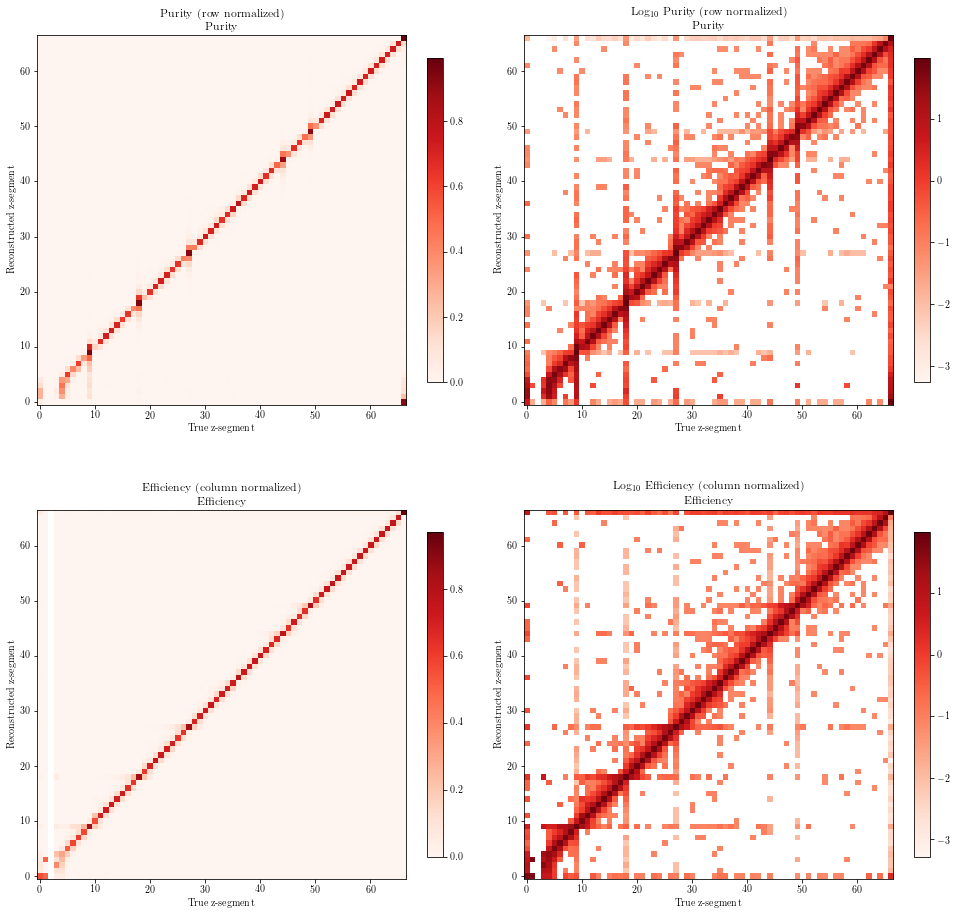

In [7]:
plot_type = 'planecode_energy_only_me1Btest'
make_plots_rowcolnormonly(arr, plot_type)

/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


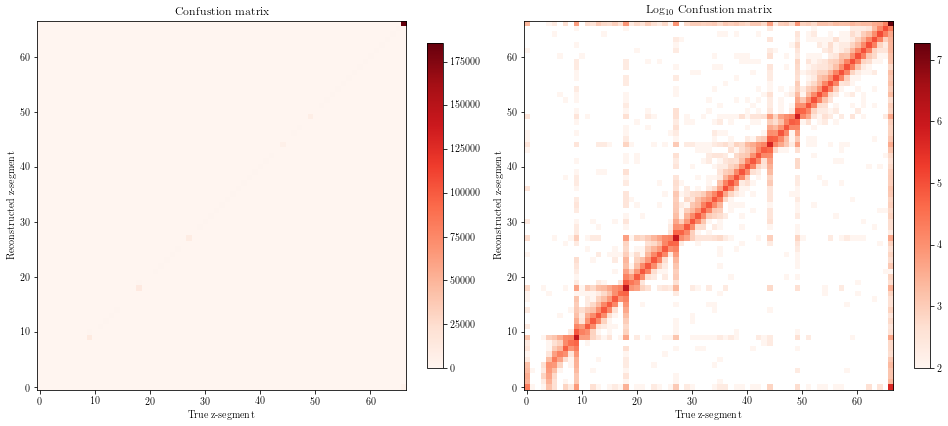

In [8]:
plot_type = 'planecode_energytime_m1Btest'
make_plots_raw(arr, plot_type)

In [9]:
arr_sums = np.sum(arr, axis=0)
arr_total = np.sum(arr)
arr_fracs = arr_sums / arr_total
print(arr_fracs)

[  1.26383838e-03   6.46464650e-06   0.00000000e+00   5.81818167e-05
   9.11515148e-04   1.31555554e-03   9.98787931e-04   3.07717174e-03
   1.82303030e-03   4.46254537e-02   1.04727270e-03   3.40040401e-03
   3.32929287e-03   3.56525253e-03   3.54585866e-03   3.16444435e-03
   3.42949503e-03   2.28202017e-03   4.77769710e-02   1.34787883e-03
   3.30343423e-03   3.49414139e-03   3.62666673e-03   3.63636366e-03
   3.34545458e-03   3.75272729e-03   2.52444437e-03   3.60500999e-02
   2.37252517e-03   3.53939389e-03   3.78828286e-03   3.58464639e-03
   3.91757581e-03   3.44565650e-03   3.72363627e-03   3.88525263e-03
   4.22787899e-03   3.94020183e-03   4.21818160e-03   3.79151525e-03
   4.41212114e-03   3.82707082e-03   4.21494944e-03   3.15797981e-03
   2.30852533e-02   2.54383846e-03   3.86909093e-03   4.18262649e-03
   3.16121220e-03   2.92783845e-02   2.45333323e-03   4.00161603e-03
   4.22141422e-03   4.22464637e-03   4.76444466e-03   4.27959580e-03
   4.50262614e-03   4.11474751e-03

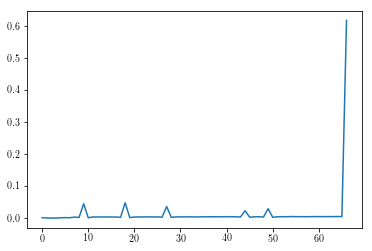

In [10]:
plt.plot(np.arange(67), arr_fracs)

In [11]:
true_downstrm_miss = np.sum(arr[66,0:65])   # real 66 reco'd elsewhere
arr_total = np.sum(arr)
true_downstrm_miss_frac = true_downstrm_miss / arr_total
print(true_downstrm_miss_frac)

0.00295111


In [12]:
pred_downstrm_miss = np.sum(arr[0:65,66])   # real target region reco'd downstream
arr_total = np.sum(arr)
pred_downstrm_miss_frac = pred_downstrm_miss / arr_total
print(pred_downstrm_miss_frac)

0.0176614


In [13]:
def do_plots(typ):
    arr_name = 'arr_' + typ + '.npy'
    arr = np.load(arr_name)
    filename_mod_str = 'me1A_' + typ
    plot_type = 'planecode_energy_only_' + filename_mod_str
    make_plots_rowcolnormonly(arr, plot_type)
    plot_type = 'planecode_energytime_' + filename_mod_str
    make_plots_raw(arr, plot_type)

In [14]:
typs = ['all', 'lowQ2', 'highQ2', 'lowW', 'highW']

/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


purity (row-normalized diagonal values)
segment  0: purity = 0.000
segment  1: purity = 0.000
segment  2: purity = 0.000
segment  3: purity = 0.015
segment  4: purity = 0.147
segment  5: purity = 0.585
segment  6: purity = 0.340
segment  7: purity = 0.559
segment  8: purity = 0.355
segment  9: purity = 0.949
segment 10: purity = 0.136
segment 11: purity = 0.684
segment 12: purity = 0.651
segment 13: purity = 0.616
segment 14: purity = 0.741
segment 15: purity = 0.706
segment 16: purity = 0.533
segment 17: purity = 0.418
segment 18: purity = 0.947
segment 19: purity = 0.209
segment 20: purity = 0.674
segment 21: purity = 0.710
segment 22: purity = 0.685
segment 23: purity = 0.751
segment 24: purity = 0.679
segment 25: purity = 0.701
segment 26: purity = 0.500
segment 27: purity = 0.902
segment 28: purity = 0.478
segment 29: purity = 0.670
segment 30: purity = 0.699
segment 31: purity = 0.649
segment 32: purity = 0.719
segment 33: purity = 0.683
segment 34: purity = 0.709
segment 35: pur

/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10



segment  6: efficiency = 0.611
segment  7: efficiency = 0.558
segment  8: efficiency = 0.547
segment  9: efficiency = 0.845
segment 10: efficiency = 0.587
segment 11: efficiency = 0.609
segment 12: efficiency = 0.639
segment 13: efficiency = 0.702
segment 14: efficiency = 0.725
segment 15: efficiency = 0.700
segment 16: efficiency = 0.669
segment 17: efficiency = 0.607
segment 18: efficiency = 0.858
segment 19: efficiency = 0.573
segment 20: efficiency = 0.697
segment 21: efficiency = 0.707
segment 22: efficiency = 0.722
segment 23: efficiency = 0.689
segment 24: efficiency = 0.729
segment 25: efficiency = 0.650
segment 26: efficiency = 0.578
segment 27: efficiency = 0.756
segment 28: efficiency = 0.534
segment 29: efficiency = 0.669
segment 30: efficiency = 0.714
segment 31: efficiency = 0.717
segment 32: efficiency = 0.682
segment 33: efficiency = 0.711
segment 34: efficiency = 0.695
segment 35: efficiency = 0.770
segment 36: efficiency = 0.728
segment 37: efficiency = 0.697
segment

segment 53: efficiency = 0.754
segment 54: efficiency = 0.642
segment 55: efficiency = 0.700
segment 56: efficiency = 0.643
segment 57: efficiency = 0.697
segment 58: efficiency = 0.756
segment 59: efficiency = 0.753
segment 60: efficiency = 0.689
segment 61: efficiency = 0.758
segment 62: efficiency = 0.718
segment 63: efficiency = 0.737
segment 64: efficiency = 0.717
segment 65: efficiency = 0.716
segment 66: efficiency = 0.969
purity (row-normalized diagonal values)
segment  0: purity = 0.000
segment  1: purity = 0.000
segment  2: purity = 0.000
segment  3: purity = 0.000
segment  4: purity = 0.143
segment  5: purity = 0.750
segment  6: purity = 0.370
segment  7: purity = 0.654
segment  8: purity = 0.504
segment  9: purity = 0.961
segment 10: purity = 0.159
segment 11: purity = 0.739
segment 12: purity = 0.703
segment 13: purity = 0.708
segment 14: purity = 0.742
segment 15: purity = 0.819
segment 16: purity = 0.629
segment 17: purity = 0.567
segment 18: purity = 0.962
segment 19: p

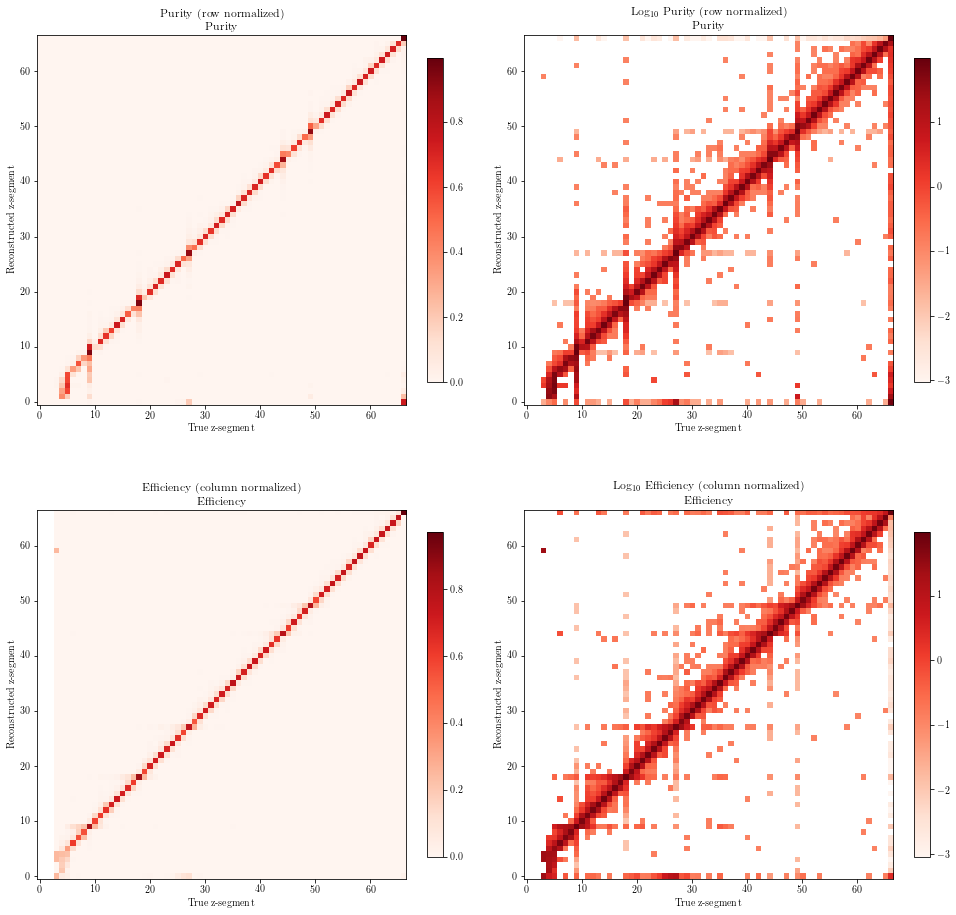

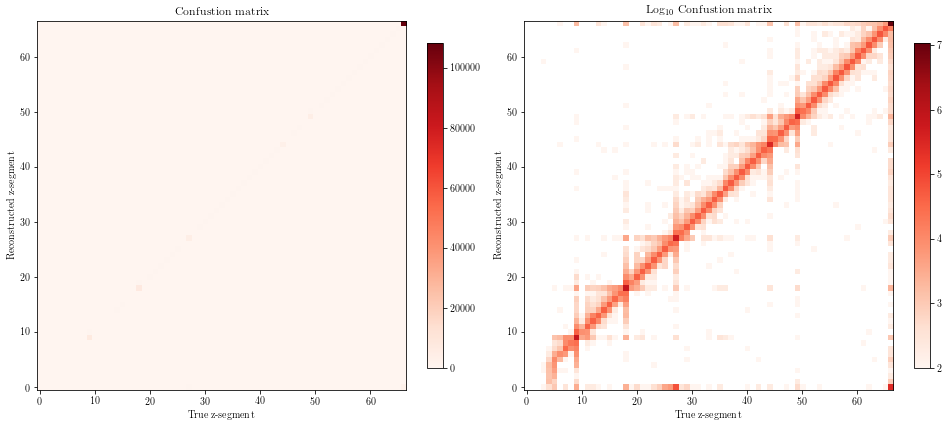

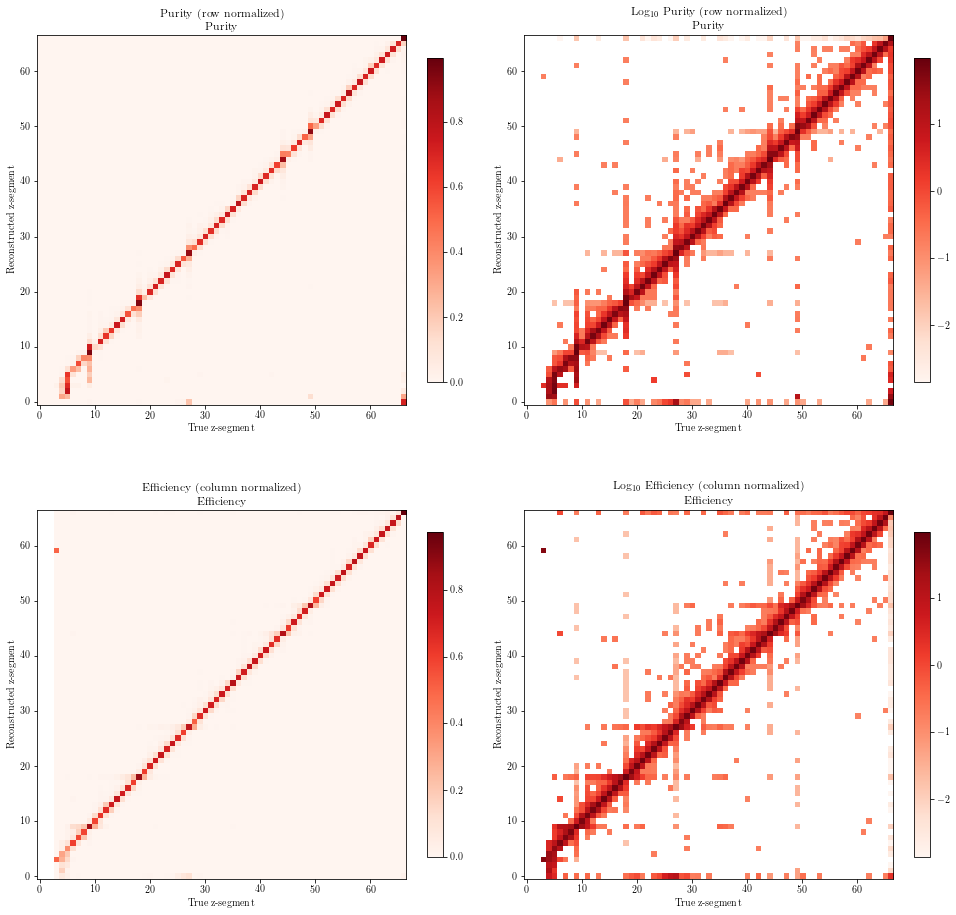

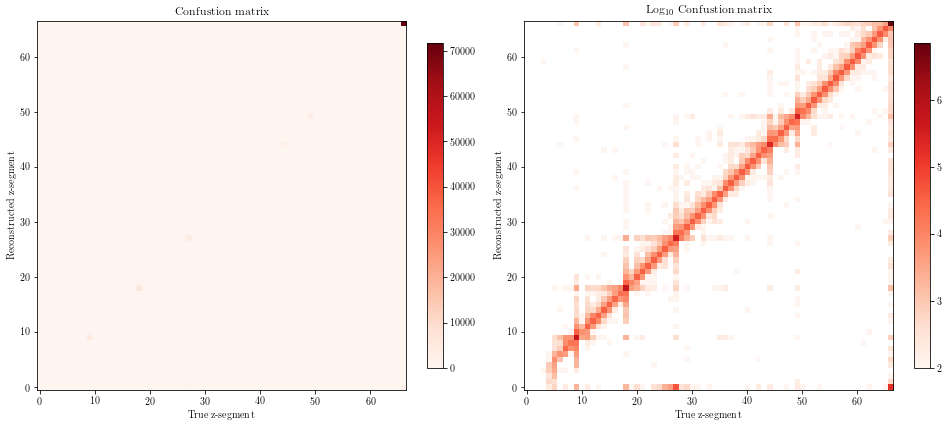

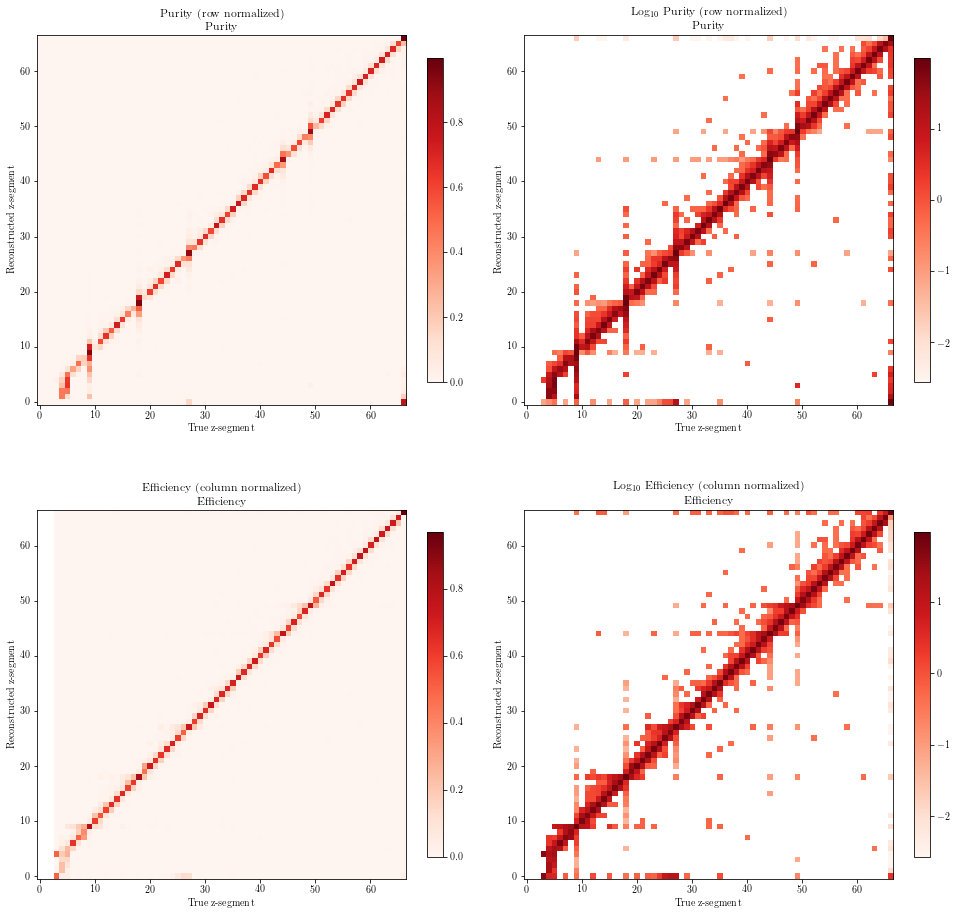

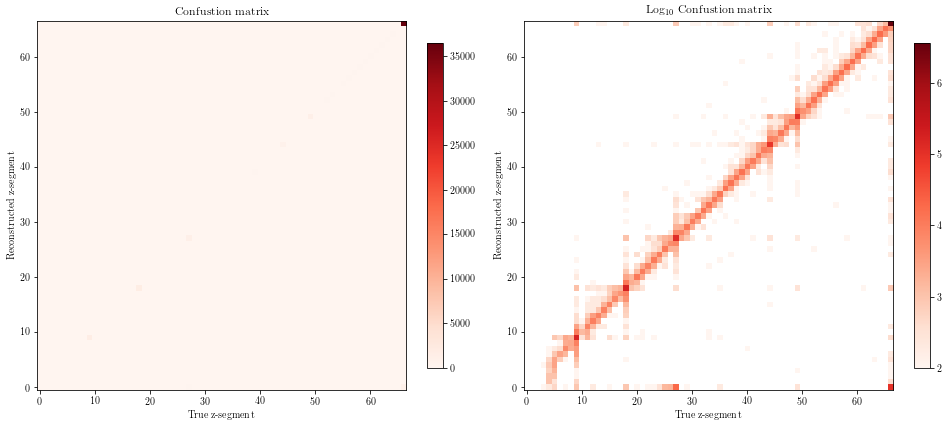

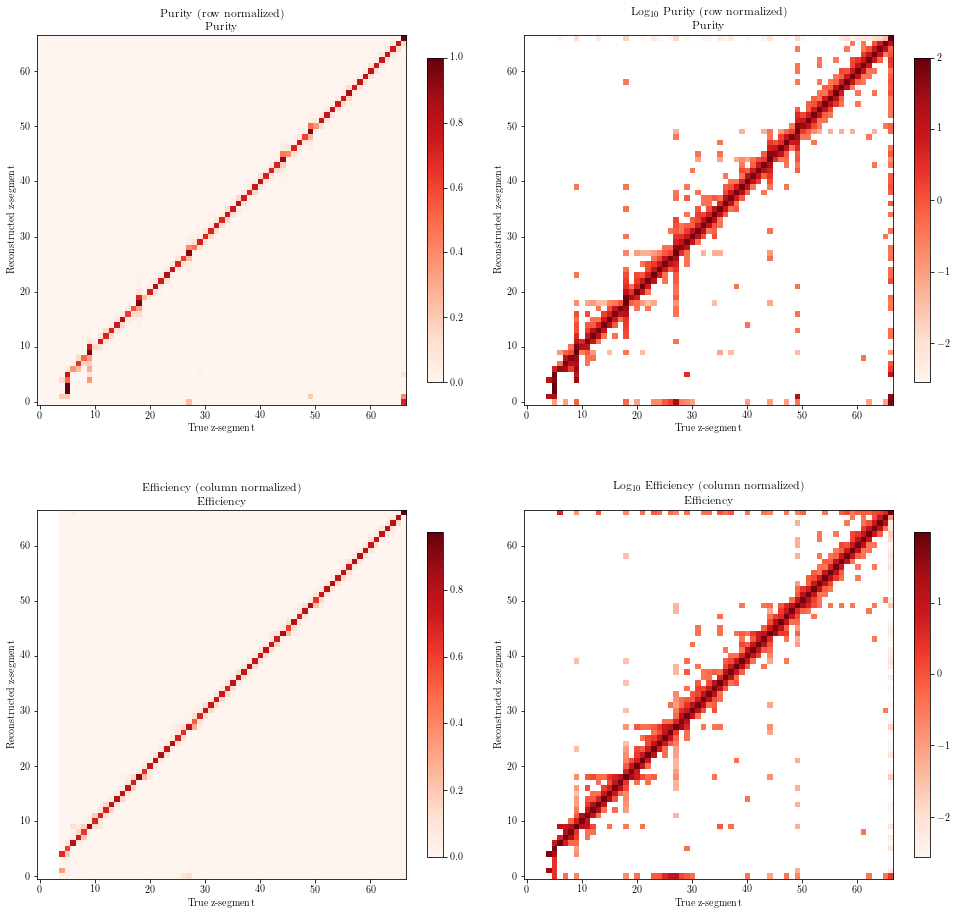

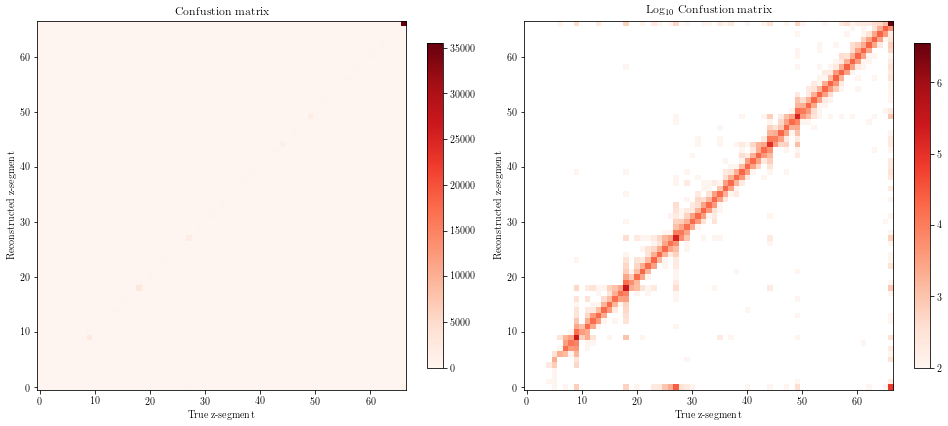

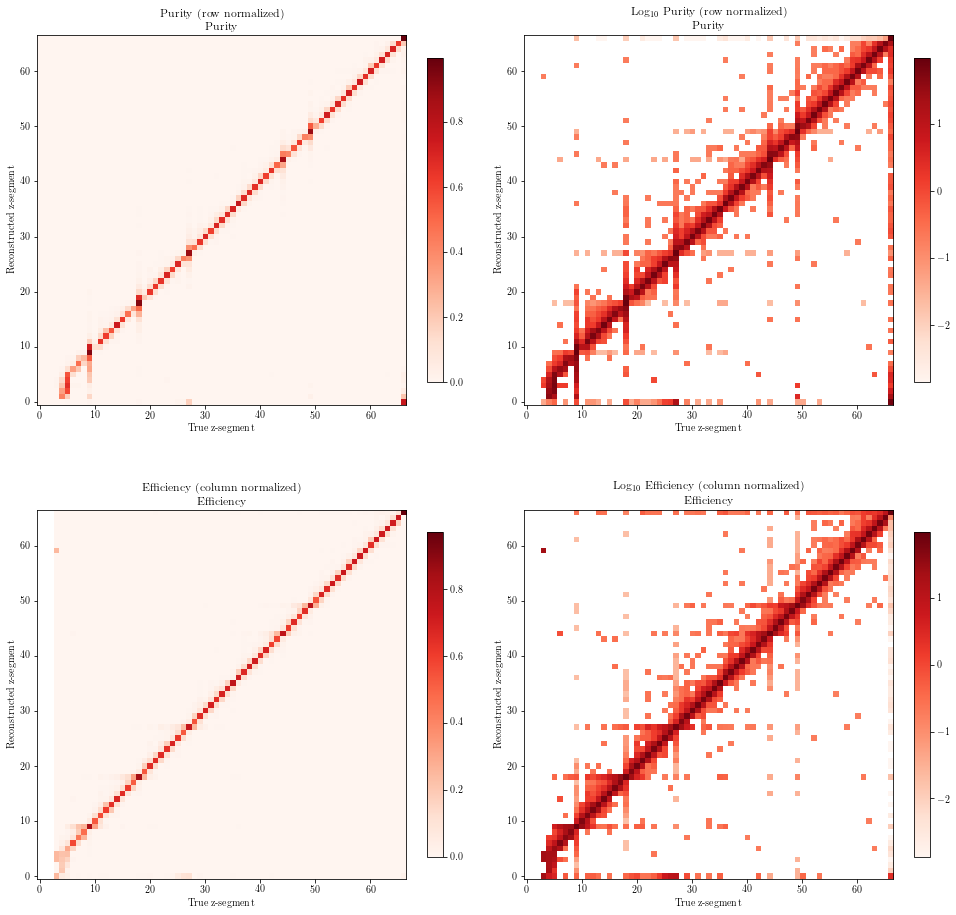

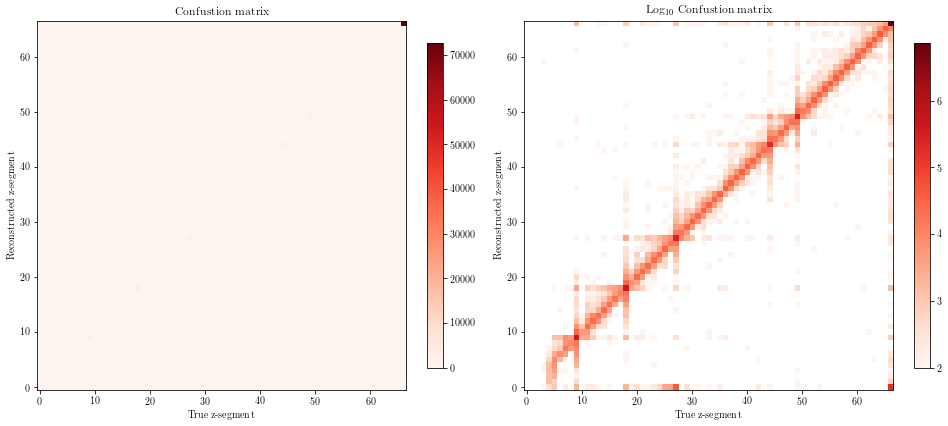

In [15]:
for t in typs:
    do_plots(t)

In [18]:
def do_off_axis_plot_ratios(typ1, typ2):
    arr1_name = 'arr_' + typ1 + '.npy'
    arr2_name = 'arr_' + typ2 + '.npy'
    arr1 = np.load(arr1_name)
    arr2 = np.load(arr2_name)
    np.fill_diagonal(arr1, 0)
    np.fill_diagonal(arr2, 0)
    filename_mod_str1 = 'me1A_' + typ1
    filename_mod_str2 = 'me1A_' + typ2
    # arr1 
    plot_type = 'planecode_energytime_offdiag_' + filename_mod_str1
    make_plots_rowcolnormonly(arr1, plot_type)
    plot_type = 'planecode_energytime_offdiag_' + filename_mod_str1
    make_plots_raw(arr1, plot_type)
    # arr2
    plot_type = 'planecode_energytime_offdiag_' + filename_mod_str2
    make_plots_rowcolnormonly(arr2, plot_type)
    plot_type = 'planecode_energytime_offdiag_' + filename_mod_str2
    make_plots_raw(arr2, plot_type)
    # arr "3"
    arr3 = arr1 / arr2
    plot_type = 'planecode_energytime_offdiag_' + filename_mod_str1 + \
        '_over_' + filename_mod_str2
    make_plots_raw(arr3, plot_type)

/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


purity (row-normalized diagonal values)
segment  0: purity = 0.000
segment  1: purity = 0.000
segment  2: purity = 0.000
segment  3: purity = 0.000
segment  4: purity = 0.000
segment  5: purity = 0.000
segment  6: purity = 0.000
segment  7: purity = 0.000
segment  8: purity = 0.000
segment  9: purity = 0.000
segment 10: purity = 0.000
segment 11: purity = 0.000
segment 12: purity = 0.000
segment 13: purity = 0.000
segment 14: purity = 0.000
segment 15: purity = 0.000
segment 16: purity = 0.000
segment 17: purity = 0.000
segment 18: purity = 0.000
segment 19: purity = 0.000
segment 20: purity = 0.000
segment 21: purity = 0.000
segment 22: purity = 0.000
segment 23: purity = 0.000
segment 24: purity = 0.000
segment 25: purity = 0.000
segment 26: purity = 0.000
segment 27: purity = 0.000
segment 28: purity = 0.000
segment 29: purity = 0.000
segment 30: purity = 0.000
segment 31: purity = 0.000
segment 32: purity = 0.000
segment 33: purity = 0.000
segment 34: purity = 0.000
segment 35: pur

/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10



segment 41: efficiency = 0.000
segment 42: efficiency = 0.000
segment 43: efficiency = 0.000
segment 44: efficiency = 0.000
segment 45: efficiency = 0.000
segment 46: efficiency = 0.000
segment 47: efficiency = 0.000
segment 48: efficiency = 0.000
segment 49: efficiency = 0.000
segment 50: efficiency = 0.000
segment 51: efficiency = 0.000
segment 52: efficiency = 0.000
segment 53: efficiency = 0.000
segment 54: efficiency = 0.000
segment 55: efficiency = 0.000
segment 56: efficiency = 0.000
segment 57: efficiency = 0.000
segment 58: efficiency = 0.000
segment 59: efficiency = 0.000
segment 60: efficiency = 0.000
segment 61: efficiency = 0.000
segment 62: efficiency = 0.000
segment 63: efficiency = 0.000
segment 64: efficiency = 0.000
segment 65: efficiency = 0.000
segment 66: efficiency = 0.000
purity (row-normalized diagonal values)
segment  0: purity = 0.000
segment  1: purity = 0.000
segment  2: purity = 0.000
segment  3: purity = 0.000
segment  4: purity = 0.000
segment  5: purity

/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in divide
/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in divide


segment 35: efficiency = 0.000
segment 36: efficiency = 0.000
segment 37: efficiency = 0.000
segment 38: efficiency = 0.000
segment 39: efficiency = 0.000
segment 40: efficiency = 0.000
segment 41: efficiency = 0.000
segment 42: efficiency = 0.000
segment 43: efficiency = 0.000
segment 44: efficiency = 0.000
segment 45: efficiency = 0.000
segment 46: efficiency = 0.000
segment 47: efficiency = 0.000
segment 48: efficiency = 0.000
segment 49: efficiency = 0.000
segment 50: efficiency = 0.000
segment 51: efficiency = 0.000
segment 52: efficiency = 0.000
segment 53: efficiency = 0.000
segment 54: efficiency = 0.000
segment 55: efficiency = 0.000
segment 56: efficiency = 0.000
segment 57: efficiency = 0.000
segment 58: efficiency = 0.000
segment 59: efficiency = 0.000
segment 60: efficiency = 0.000
segment 61: efficiency = 0.000
segment 62: efficiency = 0.000
segment 63: efficiency = 0.000
segment 64: efficiency = 0.000
segment 65: efficiency = 0.000
segment 66: efficiency = 0.000


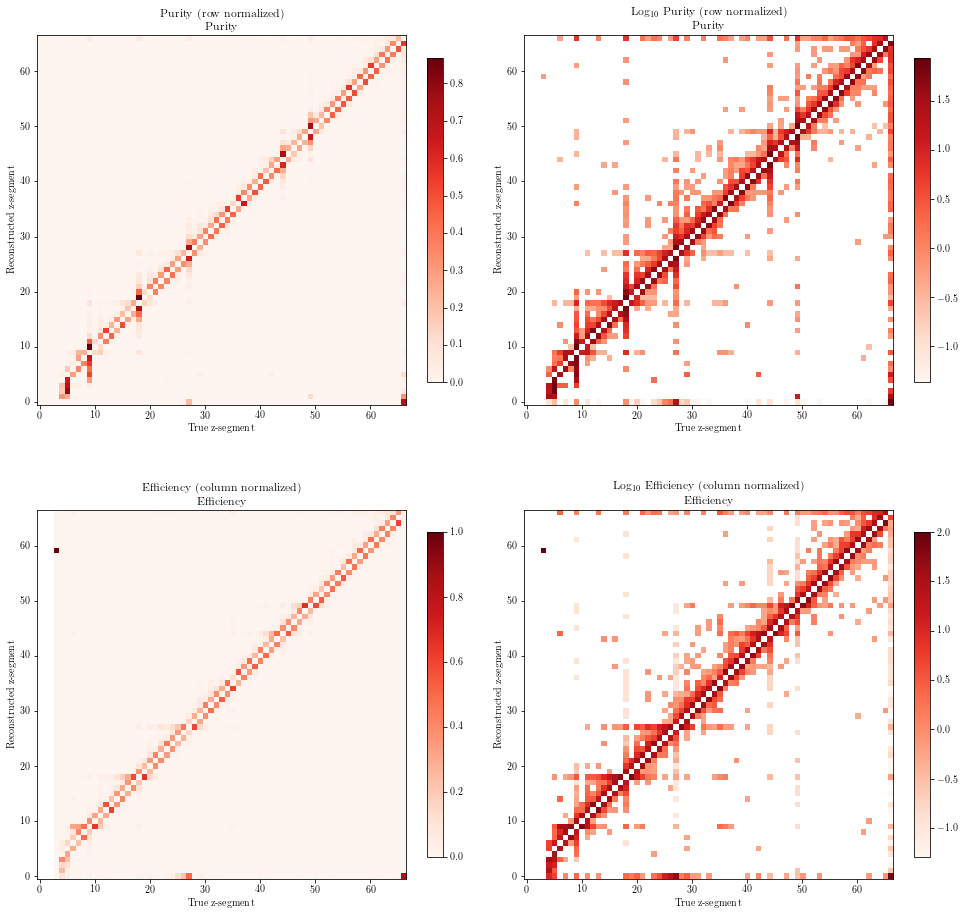

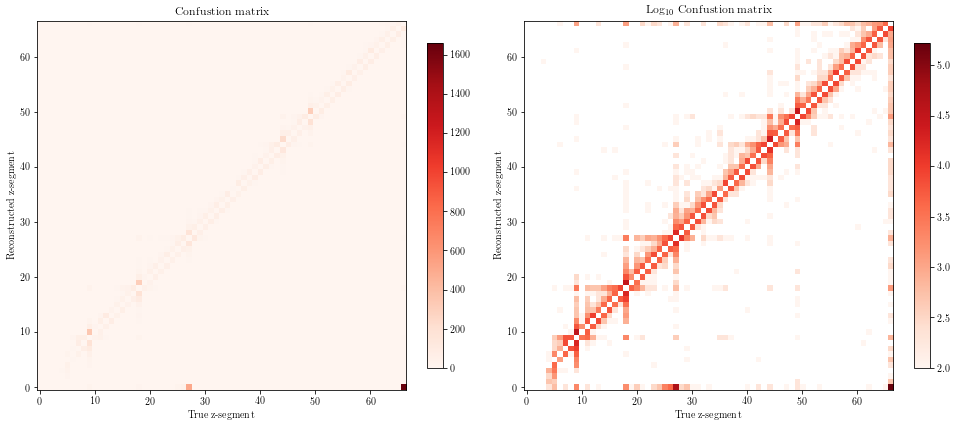

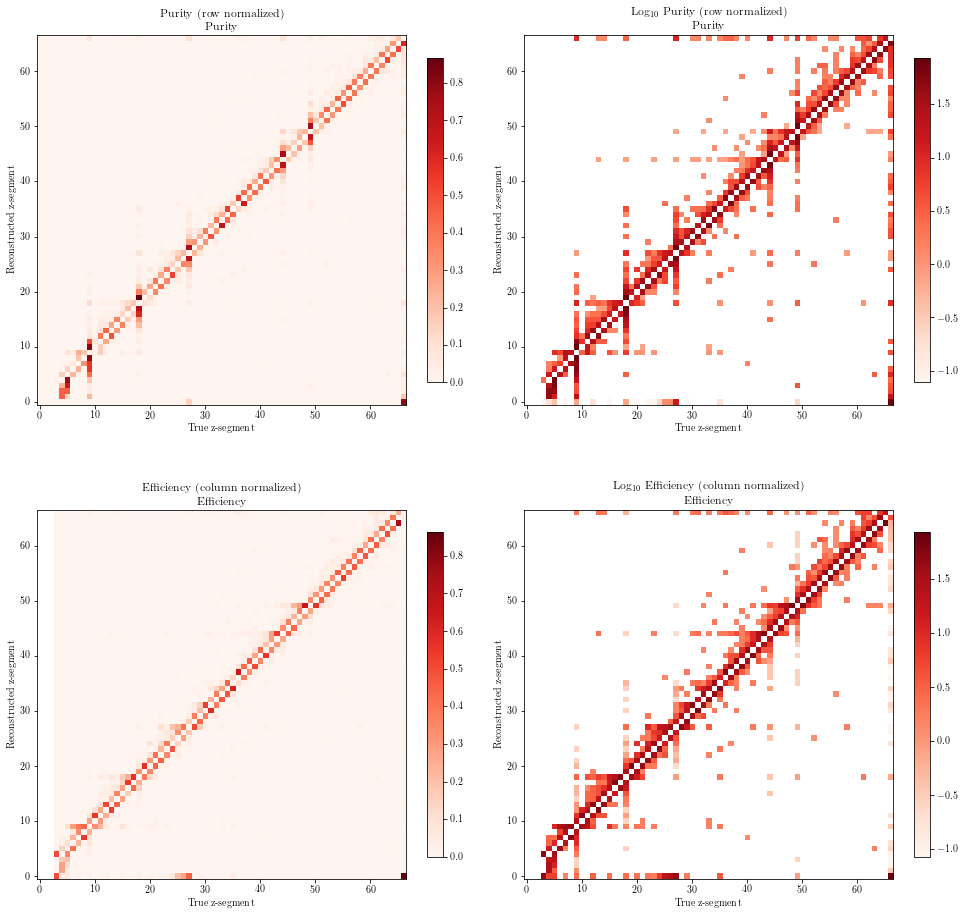

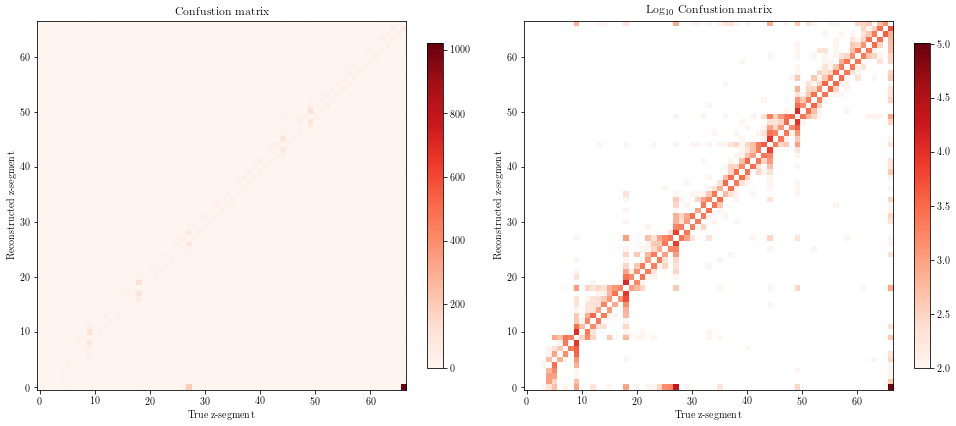

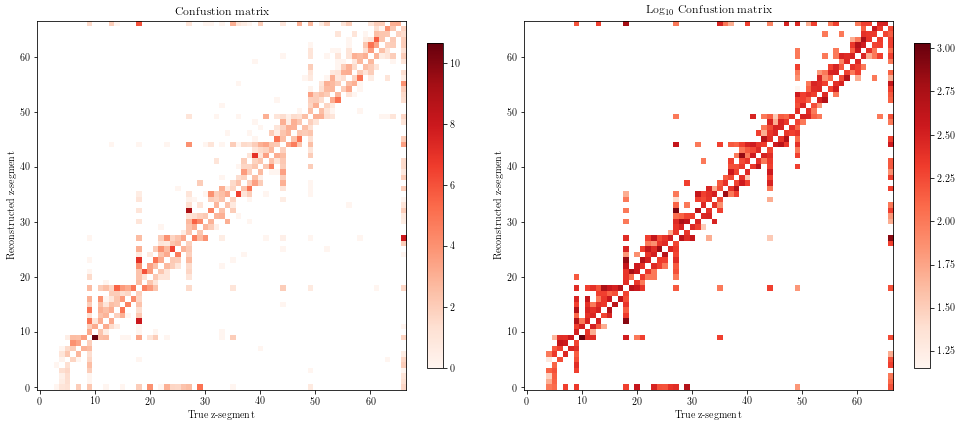

In [19]:
do_off_axis_plot_ratios('lowQ2', 'highQ2')

/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in divide
  import sys


purity (row-normalized diagonal values)
segment  0: purity = 0.000
segment  1: purity = 0.000
segment  2: purity = 0.000
segment  3: purity = 0.000
segment  4: purity = 0.000
segment  5: purity = 0.000
segment  6: purity = 0.000
segment  7: purity = 0.000
segment  8: purity = 0.000
segment  9: purity = 0.000
segment 10: purity = 0.000
segment 11: purity = 0.000
segment 12: purity = 0.000
segment 13: purity = 0.000
segment 14: purity = 0.000
segment 15: purity = 0.000
segment 16: purity = 0.000
segment 17: purity = 0.000
segment 18: purity = 0.000
segment 19: purity = 0.000
segment 20: purity = 0.000
segment 21: purity = 0.000
segment 22: purity = 0.000
segment 23: purity = 0.000
segment 24: purity = 0.000
segment 25: purity = 0.000
segment 26: purity = 0.000
segment 27: purity = 0.000
segment 28: purity = 0.000
segment 29: purity = 0.000
segment 30: purity = 0.000
segment 31: purity = 0.000
segment 32: purity = 0.000
segment 33: purity = 0.000
segment 34: purity = 0.000
segment 35: pur

/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log10
/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10


segment  7: efficiency = 0.000
segment  8: efficiency = 0.000
segment  9: efficiency = 0.000
segment 10: efficiency = 0.000
segment 11: efficiency = 0.000
segment 12: efficiency = 0.000
segment 13: efficiency = 0.000
segment 14: efficiency = 0.000
segment 15: efficiency = 0.000
segment 16: efficiency = 0.000
segment 17: efficiency = 0.000
segment 18: efficiency = 0.000
segment 19: efficiency = 0.000
segment 20: efficiency = 0.000
segment 21: efficiency = 0.000
segment 22: efficiency = 0.000
segment 23: efficiency = 0.000
segment 24: efficiency = 0.000
segment 25: efficiency = 0.000
segment 26: efficiency = 0.000
segment 27: efficiency = 0.000
segment 28: efficiency = 0.000
segment 29: efficiency = 0.000
segment 30: efficiency = 0.000
segment 31: efficiency = 0.000
segment 32: efficiency = 0.000
segment 33: efficiency = 0.000
segment 34: efficiency = 0.000
segment 35: efficiency = 0.000
segment 36: efficiency = 0.000
segment 37: efficiency = 0.000
segment 38: efficiency = 0.000
segment 

/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in divide
/Users/gnperdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in divide


segment 40: efficiency = 0.000
segment 41: efficiency = 0.000
segment 42: efficiency = 0.000
segment 43: efficiency = 0.000
segment 44: efficiency = 0.000
segment 45: efficiency = 0.000
segment 46: efficiency = 0.000
segment 47: efficiency = 0.000
segment 48: efficiency = 0.000
segment 49: efficiency = 0.000
segment 50: efficiency = 0.000
segment 51: efficiency = 0.000
segment 52: efficiency = 0.000
segment 53: efficiency = 0.000
segment 54: efficiency = 0.000
segment 55: efficiency = 0.000
segment 56: efficiency = 0.000
segment 57: efficiency = 0.000
segment 58: efficiency = 0.000
segment 59: efficiency = 0.000
segment 60: efficiency = 0.000
segment 61: efficiency = 0.000
segment 62: efficiency = 0.000
segment 63: efficiency = 0.000
segment 64: efficiency = 0.000
segment 65: efficiency = 0.000
segment 66: efficiency = 0.000


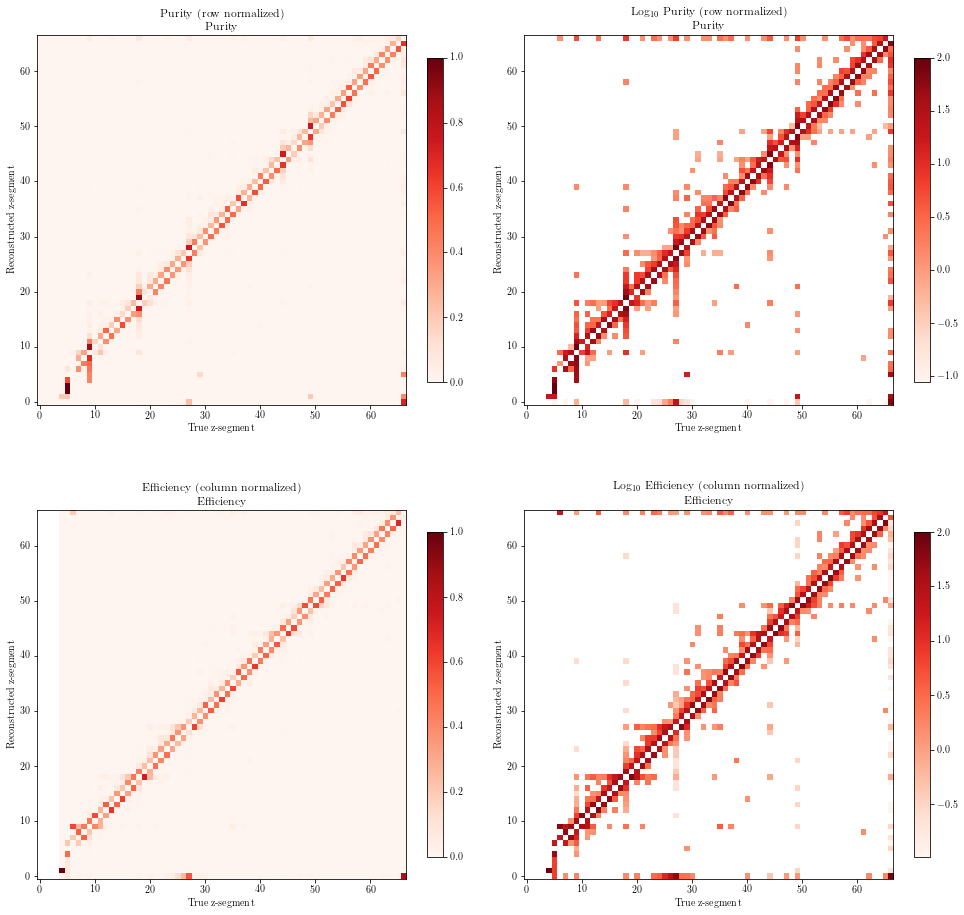

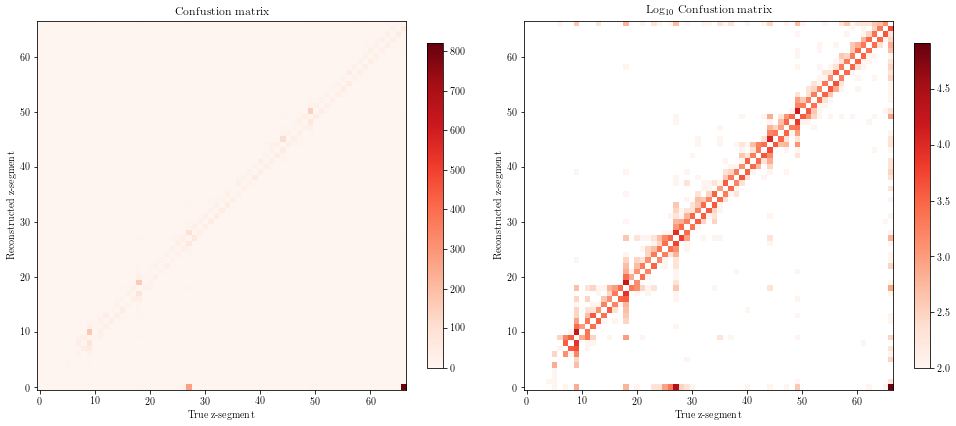

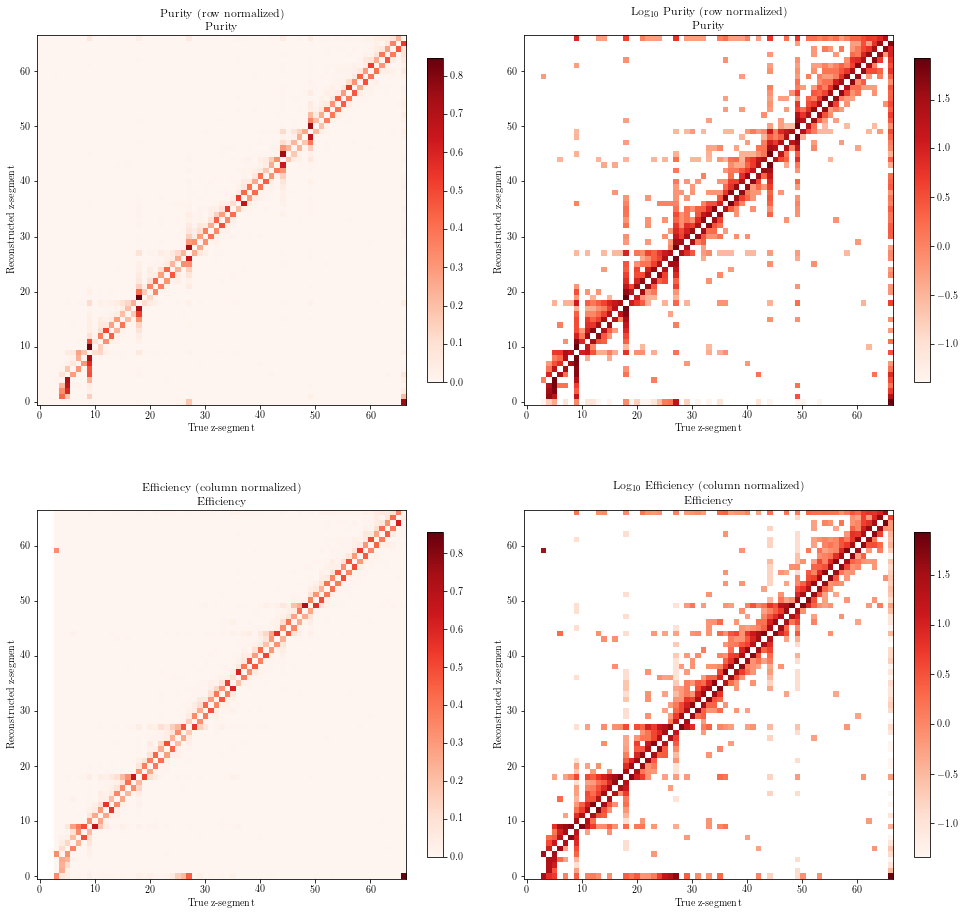

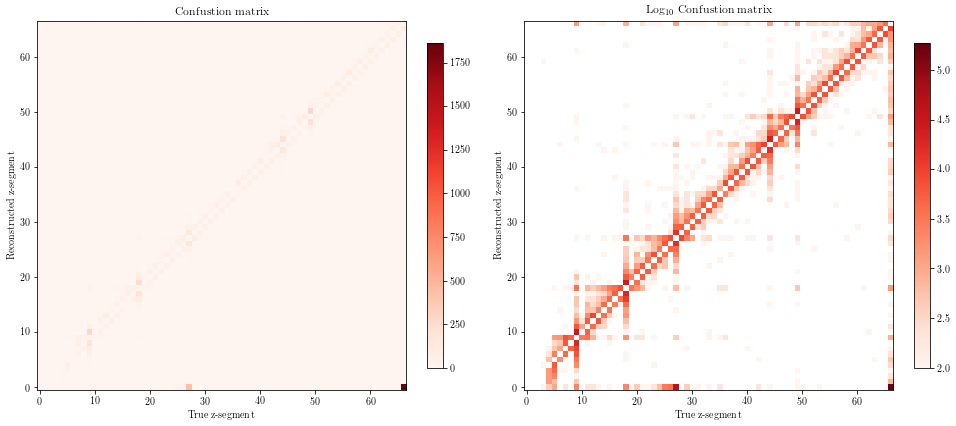

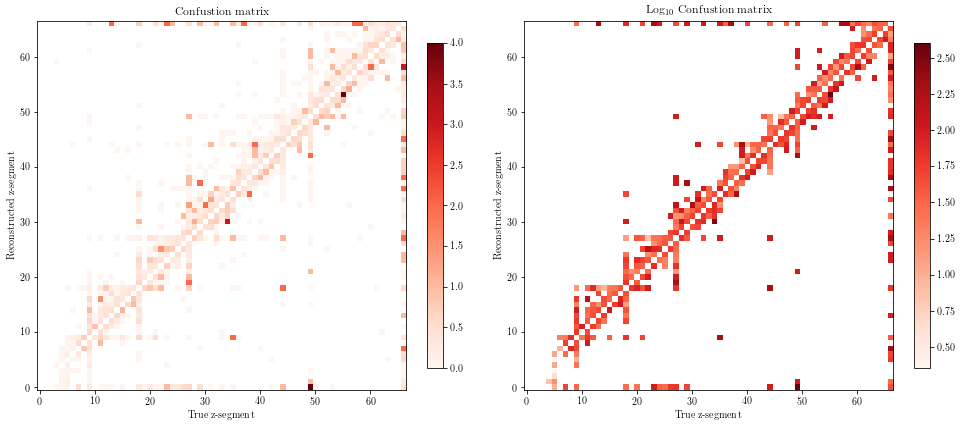

In [20]:
do_off_axis_plot_ratios('lowW', 'highW')